In [20]:
import pandas as pd
from preprocessing_utils import prepare_dataset
import numpy as np

#### Constructing training dataset

In [6]:
train_df = pd.read_csv('CheXpert-v1.0-small/train.csv')


In [7]:
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
policy = ['ones','zeroes','mixed']
x_path,labels = prepare_dataset(train_df,policy[-1],class_names)

train_df = pd.DataFrame({'path':x_path})
df2 = pd.DataFrame(labels,columns=class_names)
train_df[list(df2.columns)]=df2 

#### Constructing validation dataset

In [8]:
valid_df = pd.read_csv('CheXpert-v1.0-small/valid.csv')


In [9]:
valid_x_path, valid_labels = prepare_dataset(valid_df,policy[-1],class_names)
valid_df = pd.DataFrame({'path':valid_x_path})
df2_valid = pd.DataFrame(valid_labels,columns=class_names)
valid_df[list(df2.columns)]=df2_valid

#### Dataset formation according to torch (using dataloaders)

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from dataset import CheXpertDataset

transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # normalize grayscale images
])

class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
train_dataset = CheXpertDataset(train_df, class_names, transform=transform)
valid_dataset = CheXpertDataset(valid_df, class_names, transform=transform)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)

# Verify data loading
images, labels = next(iter(train_loader))
print(f'Image batch shape: {images.shape}')
print(f'Label batch shape: {labels.shape}')


Image batch shape: torch.Size([32, 3, 224, 224])
Label batch shape: torch.Size([32, 5])


#### Visualising example

In [22]:
test_X, test_Y = next(iter(valid_loader))

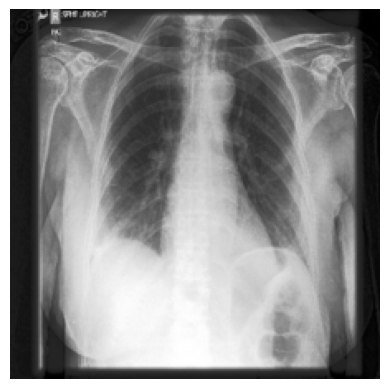

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Select the first image in the batch
image = test_X[0].permute(1, 2, 0).numpy()  # Change shape to (224, 224, 3)

# Denormalize if needed (assuming normalization was mean=0.5, std=0.5)
image = (image * 0.5) + 0.5

# Plot the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()
